# **Hand Written Digit Prediction - Classification Analysis**

-------------

## **Objective**

## **Data Source**

## **Import Library**

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## **Import Data**

In [37]:
from sklearn.datasets import load_digits

In [38]:
data = load_digits()

## **Describe Data**

In [39]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## **Data Visualization**

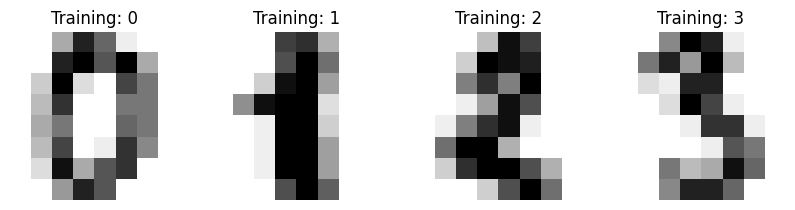

In [40]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,img,label in zip(axes,data.images,data.target):
    ax.set_axis_off()
    ax.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training: %i"% (label))

## **Data Preprocessing**

In [41]:
data.images.shape

(1797, 8, 8)

In [42]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [43]:
data.images[0].shape

(8, 8)

In [44]:
len(data.images)

1797

In [45]:
n_samples = len(data.images)
m_data = data.images.reshape((n_samples,-1))


In [46]:
m_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [47]:
m_data[0].shape

(64,)

In [48]:
m_data.shape

(1797, 64)

## **Define Target Variable (y) and Feature Variables (X)**

In [49]:
m_data = m_data/16

In [50]:
X = m_data
y = data.target

## **Train Test Split**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(m_data,data.target,test_size=0.3)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()

## **Model Evaluation**

In [56]:
model.fit(X_train,y_train)

SVC()

## **Prediction**

In [57]:
predictions = model.predict(X_test)

In [58]:
predictions

array([2, 6, 6, 9, 6, 9, 6, 5, 7, 8, 9, 4, 7, 6, 6, 3, 9, 2, 9, 9, 3, 5,
       1, 2, 0, 0, 5, 1, 3, 6, 2, 9, 4, 0, 7, 8, 3, 0, 3, 7, 7, 2, 7, 5,
       1, 6, 6, 5, 7, 6, 9, 4, 3, 7, 4, 4, 0, 9, 0, 9, 5, 7, 1, 6, 3, 9,
       9, 3, 7, 4, 8, 5, 2, 7, 5, 5, 2, 8, 7, 8, 0, 4, 6, 6, 9, 3, 5, 8,
       4, 7, 0, 3, 4, 1, 9, 1, 7, 8, 8, 6, 0, 4, 8, 4, 4, 6, 6, 9, 8, 1,
       9, 3, 3, 8, 1, 0, 7, 7, 8, 8, 9, 6, 0, 6, 7, 1, 1, 8, 5, 0, 9, 0,
       6, 4, 2, 7, 9, 6, 7, 0, 8, 1, 7, 5, 3, 4, 6, 3, 5, 4, 9, 8, 9, 1,
       4, 7, 7, 4, 5, 5, 7, 0, 9, 5, 6, 6, 5, 1, 0, 7, 3, 6, 1, 3, 4, 5,
       1, 9, 8, 9, 2, 2, 6, 7, 5, 2, 9, 9, 3, 5, 2, 5, 2, 8, 0, 0, 7, 4,
       2, 7, 7, 5, 6, 6, 1, 4, 2, 8, 5, 0, 9, 5, 3, 4, 8, 1, 1, 8, 0, 5,
       8, 8, 8, 0, 0, 9, 0, 1, 9, 9, 3, 7, 6, 0, 0, 2, 1, 5, 9, 4, 5, 8,
       4, 7, 8, 1, 5, 2, 3, 9, 8, 0, 0, 4, 9, 5, 5, 9, 4, 9, 2, 1, 4, 7,
       0, 3, 0, 6, 5, 3, 0, 9, 6, 0, 9, 0, 1, 7, 2, 7, 3, 0, 5, 7, 7, 4,
       8, 4, 8, 0, 5, 1, 1, 2, 6, 8, 0, 8, 7, 5, 1,

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
print(confusion_matrix(predictions,y_test))

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  1  0  2  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  1  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 59  0  0]
 [ 0  0  0  1  0  0  0  0 57  0]
 [ 0  0  0  0  0  1  0  0  1 59]]


In [61]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      0.95      0.97        57
           2       1.00      1.00      1.00        44
           3       0.96      1.00      0.98        48
           4       1.00      1.00      1.00        47
           5       0.98      0.98      0.98        50
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00        59
           8       0.95      0.98      0.97        58
           9       1.00      0.97      0.98        61

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

